In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [165]:
dfs = []
for i in range(1,5):
    path = '/kaggle/input/unsw-nb15/UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None))
combined_data = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single df

In [166]:
combined_data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [167]:
dataset_columns = pd.read_csv('/kaggle/input/unsw-nb15/NUSW-NB15_features.csv',encoding='ISO-8859-1')
dataset_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          49 non-null     int64 
 1   Name         49 non-null     object
 2   Type         49 non-null     object
 3   Description  49 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [171]:
combined_data.columns = dataset_columns['Name']
combined_data.head(5)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [174]:
combined_data.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object', name='Name')

# **----------------------IP tracking---------------------**

# getting number count of ips with attack

In [176]:
import pandas as pd

attack_data = combined_data[combined_data['Label'] == 1]

# Select only the columns with IP addresses
ip_columns = ['srcip', 'dstip']
attack_ips = attack_data[ip_columns]

num_samples = attack_data.shape[0]  # or len(attack_data)

print(f'Number of samples with label 1 (attack): {num_samples}')

# Display the filtered IP addresses
print(attack_ips.head())


Number of samples with label 1 (attack): 321283
Name         srcip           dstip
20    175.45.176.3  149.171.126.18
21    175.45.176.2  149.171.126.16
22    175.45.176.0  149.171.126.16
39    175.45.176.2  149.171.126.16
40    175.45.176.2  149.171.126.10


# getting unique IPs from source IPs

In [183]:


# Filter rows where the label is 1 (indicating an attack)
attack_data = combined_data[combined_data['Label'] == 1]

# Extract unique source IPs
unique_src_ips = attack_data['srcip'].unique()


# Count unique IPs
num_unique_src_ips = len(unique_src_ips)


print(f'Number of unique source IPs with(attack): {num_unique_src_ips}')


# Optionally, display some of the unique IPs
print(f'Some unique source IPs: {unique_src_ips[:5]}')



Number of unique source IPs with(attack): 4
Some unique source IPs: ['175.45.176.3' '175.45.176.2' '175.45.176.0' '175.45.176.1']


# dsitibutions of attacks by each unique attack


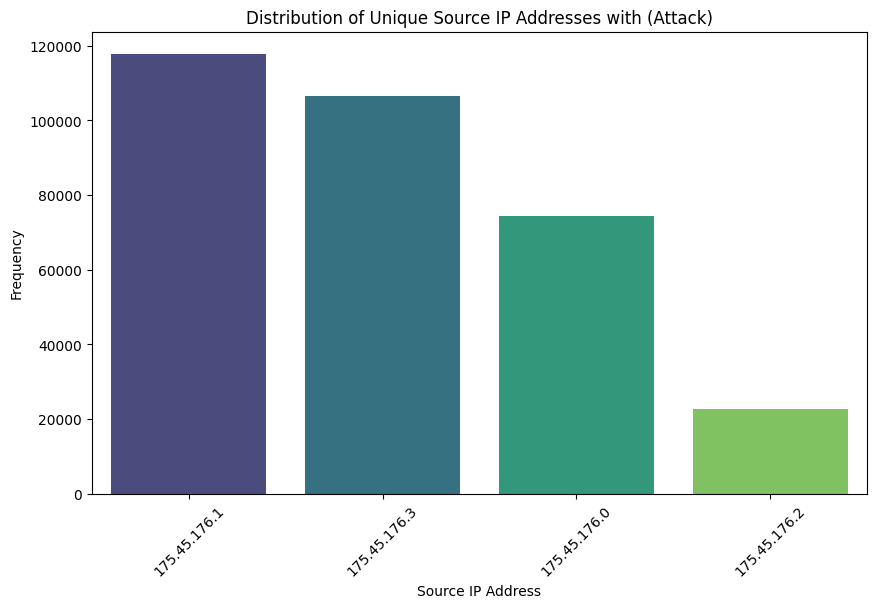

In [182]:
# Extract source IP addresses and count their frequencies
ip_counts = attack_data['srcip'].value_counts()

# Create a DataFrame for plotting
ip_distribution = ip_counts.reset_index()
ip_distribution.columns = ['Source IP', 'Frequency']

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Source IP', y='Frequency', data=ip_distribution, palette='viridis')
plt.xticks(rotation=45)  # Rotate IP labels for better readability
plt.xlabel('Source IP Address')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Source IP Addresses with (Attack)')
plt.show()

# these 4 IPs can be blocked and so that the risk of malicious attack can be reduced

# **------------------Threat Scoring----------------**

# these scores are according to damage rate 

In [184]:
import pandas as pd


threat_scores = {
    "Normal": 0,
    "Reconnaissance": 3,
    "Fuzzers": 4,
    "Backdoor": 6,
    "Exploits": 7,
    "Analysis": 5,
    "DoS": 8,
    "Worms": 9,
    "Shellcode": 9,
    "Generic": 2
}

# Assuming df is your DataFrame
combined_data['threat_score'] = combined_data['attack_cat'].map(threat_scores)

# Check the first few rows
print(combined_data.head())


Name       srcip  sport          dstip dsport proto state       dur  sbytes  \
0     59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055     132   
1     59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133     528   
2     59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119     146   
3     59.166.0.5   3593  149.171.126.5     53   udp   CON  0.001209     132   
4     59.166.0.3  49664  149.171.126.0     53   udp   CON  0.001169     146   

Name  dbytes  sttl  ...  ct_srv_src  ct_srv_dst  ct_dst_ltm ct_src_ ltm  \
0        164    31  ...           3           7           1           3   
1        304    31  ...           2           4           2           3   
2        178    31  ...          12           8           1           2   
3        164    31  ...           6           9           1           1   
4        178    31  ...           7           9           1           1   

Name  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  attack_cat  Labe

# how frequently each threat score appears in our dataset

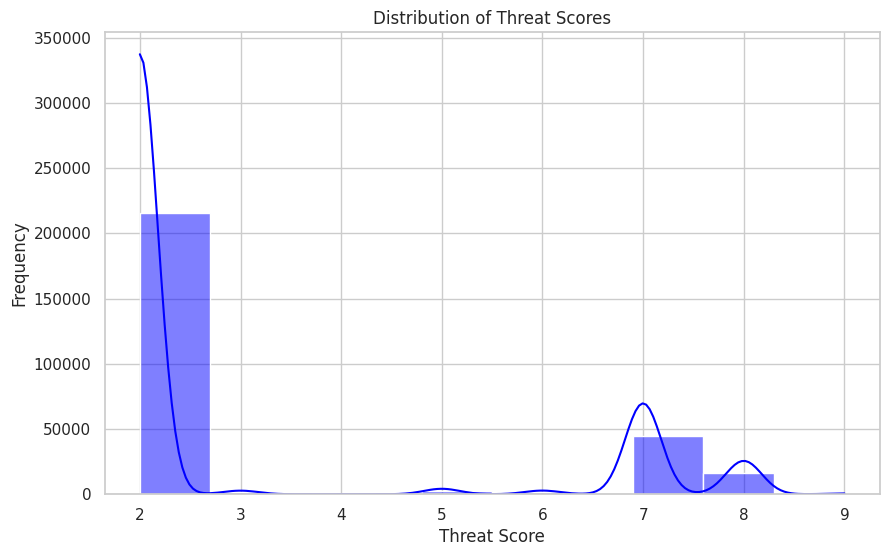

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the distribution of threat scores
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['threat_score'], bins=10, kde=True, color='blue')
plt.title('Distribution of Threat Scores')
plt.xlabel('Threat Score')
plt.ylabel('Frequency')
plt.show()


#  how different attack categories distribute across the threat scores.

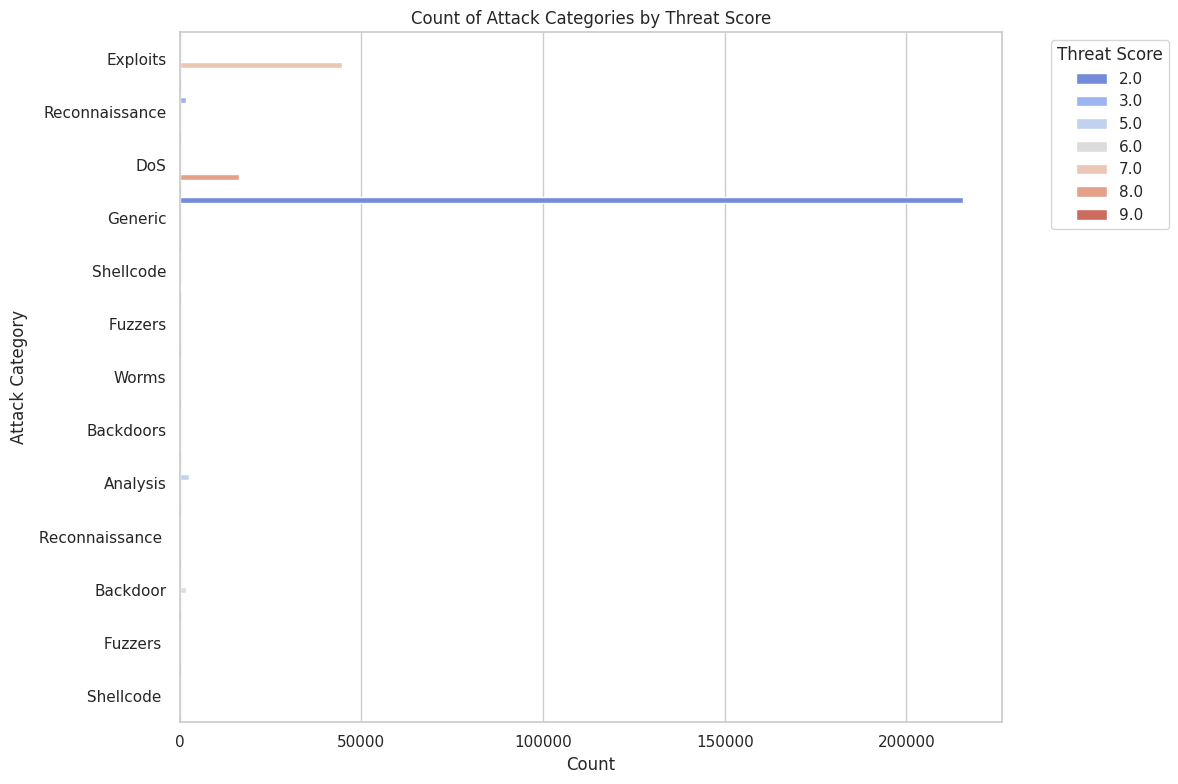

In [187]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(y='attack_cat', hue='threat_score', data=combined_data, palette='coolwarm')

plt.legend(title='Threat Score', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Count of Attack Categories by Threat Score')
plt.xlabel('Count')
plt.ylabel('Attack Category')


plt.tight_layout()

plt.show()

# how the threat score correlates with other features like duration (dur) duration

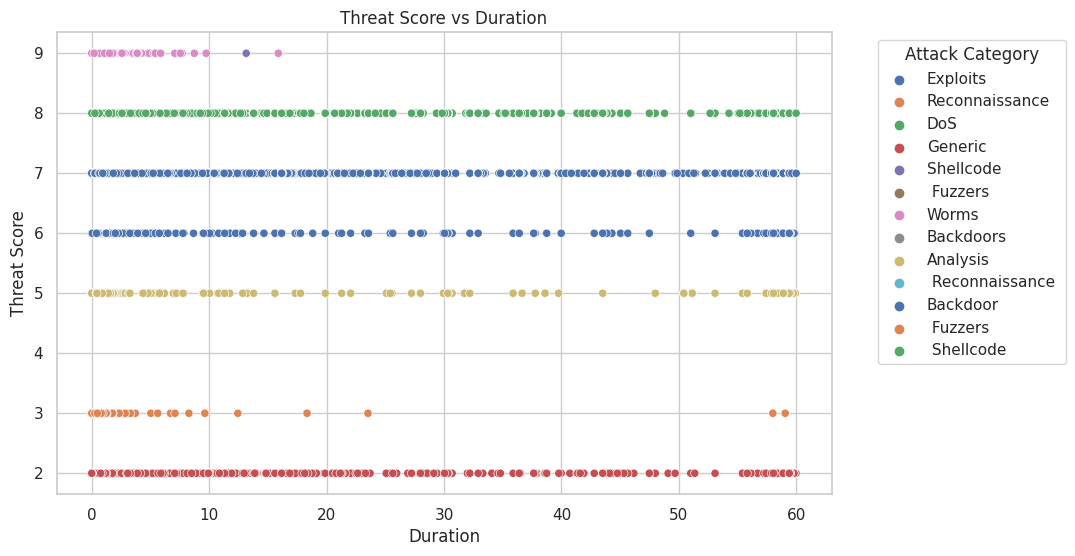

In [188]:
# Scatter plot for Threat Score vs Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dur', y='threat_score', data=combined_data, hue='attack_cat', palette='deep')
plt.title('Threat Score vs Duration')
plt.xlabel('Duration')
plt.ylabel('Threat Score')
plt.legend(title='Attack Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
